In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/juhan/Untitled Folder/파이썬머신러닝/lecture1/data_preprocessing.csv",encoding="UTF-8")
df.shape

(10, 4)

In [3]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [5]:
X = df.iloc[:,:3].values
y = df.iloc[:,3].values


In [6]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [7]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [8]:
#결측값을 평균값으로 처리

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(X[:,1:3])

SimpleImputer()

In [9]:
X[:,1:3] = imputer.transform(X[:,1:3])


In [10]:
#결측값들을 평균값으로 대체한것을 확인
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],
                      remainder='passthrough')
X = ct.fit_transform(X)

In [12]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [13]:
#pnadas로 처리하는방법 pd.get_dummies

#pd.get_dummies(df.iloc[:,:3])   첫열부터 2번째열까지 열들을 원핫인코딩

pd.get_dummies(df['Country']) #Country칼럼값들만 원핫인코딩

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,1,0
5,1,0,0
6,0,0,1
7,1,0,0
8,0,1,0
9,1,0,0


In [14]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [15]:
#from sklearn.preprocessing impor LabelEncoder
#le에 LabelEncoder() 할당
#y에 fit_transform으로 처리한값 할당

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:

y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [17]:
#

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
X.shape

(10, 5)

In [19]:
X_train.shape

(8, 5)

In [20]:
X_test.shape

(2, 5)

In [21]:
X_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [22]:
X_train[:,3:]

array([[38.77777777777778, 52000.0],
       [40.0, 63777.77777777778],
       [44.0, 72000.0],
       [38.0, 61000.0],
       [27.0, 48000.0],
       [48.0, 79000.0],
       [50.0, 83000.0],
       [35.0, 58000.0]], dtype=object)

In [23]:
#최대/최소값이 각각 1, 0이 되도록 스케일링

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train[:,3:] = mms.fit_transform(X_train[:,3:])
X_test[:,3:] = mms.transform(X_test[:,3:])

In [24]:
X_train

array([[0.0, 0.0, 1.0, 0.5120772946859904, 0.11428571428571432],
       [0.0, 1.0, 0.0, 0.5652173913043479, 0.45079365079365075],
       [1.0, 0.0, 0.0, 0.7391304347826089, 0.6857142857142855],
       [0.0, 0.0, 1.0, 0.4782608695652175, 0.37142857142857144],
       [0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 0.9130434782608696, 0.8857142857142857],
       [0.0, 1.0, 0.0, 1.0, 1.0],
       [1.0, 0.0, 0.0, 0.34782608695652173, 0.2857142857142856]],
      dtype=object)

In [25]:
#standartscaler : 평균과표준편차를 이용한 기본스케일

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train[:,3:] = ss.fit_transform(X_train[:,3:])
X_test[:,3:] = ss.transform(X_test[:,3:])

In [26]:
X_train

array([[0.0, 0.0, 1.0, -0.19159184384578537, -1.0781259408412425],
       [0.0, 1.0, 0.0, -0.014117293757057581, -0.07013167641635436],
       [1.0, 0.0, 0.0, 0.5667085065333245, 0.6335624327104541],
       [0.0, 0.0, 1.0, -0.3045301939022482, -0.3078661727429788],
       [0.0, 0.0, 1.0, -1.9018011447007983, -1.4204636155515822],
       [1.0, 0.0, 0.0, 1.1475343068237058, 1.2326533634535486],
       [0.0, 1.0, 0.0, 1.4379472069688963, 1.5749910381638883],
       [1.0, 0.0, 0.0, -0.740149544120035, -0.5646194287757338]],
      dtype=object)

In [27]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1])

# Quiz

slkearn.preprocessing.StandardScaler으로 사용하는 표준화 방식으로 계산한 z값과 직접 계산한 z값을 비교해 보세요.

In [28]:
from sklearn.preprocessing import StandardScaler

# Z값????????????????

# Simple Linear Regression

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [53]:
df = pd.read_csv("C:/Users/juhan/Untitled Folder/파이썬머신러닝/lecture2/Salary_Data.csv")
df.shape

(30, 2)

In [54]:
df.head()

,YearsExperience,Salary
0,1.1,43610
1,1.3,54936
2,1.5,41160
3,2.0,49240
4,2.2,45134


In [55]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,84118.000000
std,2.837888,30414.439404
min,1.100000,41160.000000
25%,3.200000,59507.250000
50%,4.700000,71052.500000
75%,7.700000,115466.000000
max,10.500000,137827.000000


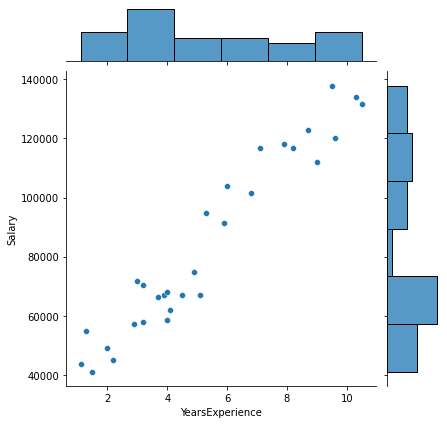

In [56]:
sns.jointplot(data=df,x='YearsExperience',y='Salary')

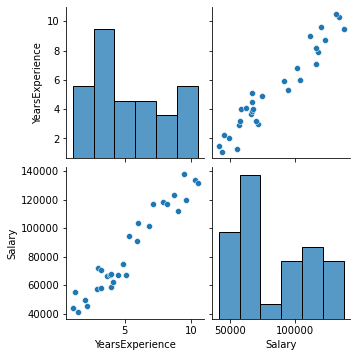

In [57]:
sns.pairplot(df)

In [58]:
#

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [59]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [60]:
y.head()

0    43610
1    54936
2    41160
3    49240
4    45134
Name: Salary, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [62]:
X_train.shape

(24, 1)

In [63]:
X_test.shape

(6, 1)

In [64]:
X.shape

(30, 1)

In [65]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [66]:
# y=ax+b : a값=계수 
# coefficient : 계수를 뜻함
#그래프로나타날때 기울기를 뜻함 뜻함

regressor.coef_

array([10116.36973003])

In [67]:
# y=ax+b    x값이 0일때 y=b가된다 이를 y-절편이라한다
# intercept : 절편을 뜻함ept : 절편을 뜻함
regressor.intercept_

29166.070331779556

# predict value

In [68]:
y_pred = regressor.predict(X_test)

In [69]:
X_test

,YearsExperience
17,5.3
21,7.1
10,3.9
19,6.0
14,4.5
20,6.8


In [70]:
y_pred

array([ 82782.82990092, 100992.29541497,  68619.91227888,  89864.28871194,
        74689.7341169 ,  97957.38449596])

In [48]:
y_train_pred = regressor.predict(X_train)
y_train_pred 

array([125271.58276703,  49398.80979183, 117178.48698301, 109085.39119899,
       112120.30211799,  51422.08373784,  44340.62492682, 120213.39790201,
        59515.17952186,  88852.65173893,  70643.18622489,  61538.45346786,
       126283.21974003,  42317.35098081,  80759.55595491,  40294.07703481,
        78736.28200891, 135387.95249705, 133364.67855105,  66596.63833288,
        61538.45346786,  69631.54925188,  69631.54925188,  58503.54254886])

In [49]:
y_train

26    137827
3      49240
24    123019
22    118248
23    116657
4      45134
2      41160
25    112064
6      71758
18     91277
13     62055
7      57969
27    120045
1      54936
16     67047
0      43610
15     74723
29    131555
28    133861
9      66329
8      70347
12     68035
11     58658
5      57071
Name: Salary, dtype: int64

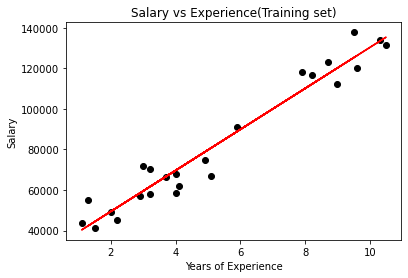

In [71]:
#트레인셋 시각화
plt.scatter(X_train,y_train, color='black')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Salary vs Experience(Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

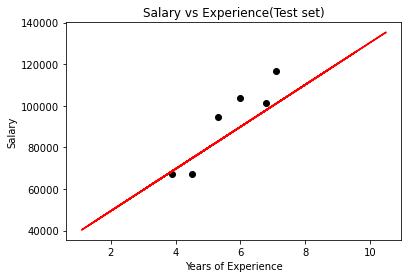

In [73]:
# test set visualiztion

plt.scatter(X_test,y_test, color = 'black')
plt.plot(X_train, regressor.predict(X_train),color='red')
plt.title('Salary vs Experience(Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [74]:
df = pd.read_csv("C:/Users/juhan/Untitled Folder/파이썬머신러닝/lecture2/IceCreamData.csv")
df.shape

(500, 2)

In [75]:
df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [76]:
df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


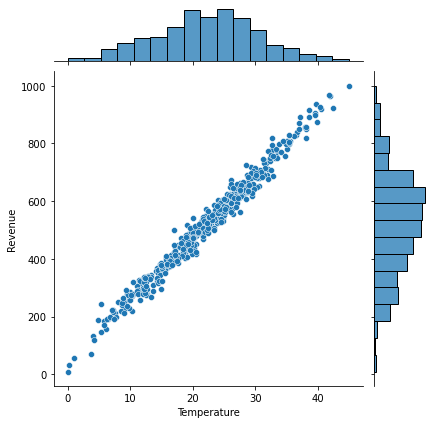

In [77]:
sns.jointplot(data=df,x='Temperature',y='Revenue')

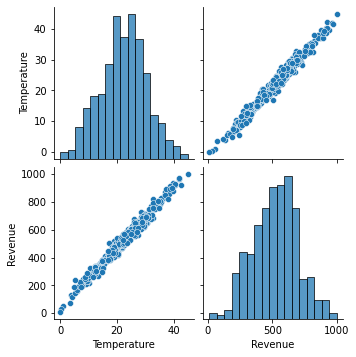

In [78]:
sns.pairplot(df)

In [85]:
X = df[['Temperature']]

y = df['Revenue']

In [86]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [81]:
y

0      534.799028
1      625.190122
2      660.632289
3      487.706960
4      316.240194
          ...    
495    524.746364
496    755.818399
497    306.090719
498    566.217304
499    655.660388
Name: Revenue, Length: 500, dtype: float64

In [111]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [112]:
X_train.shape

(400, 1)

In [113]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [114]:
regressor.coef_

array([21.33925059])

In [115]:
regressor.intercept_

47.32149169746572

In [117]:
# predict value

y_pred = regressor.predict(X_test)
y_pred

array([ 688.10093476,  592.56495197,  701.05598675,  296.87416155,
        442.27603204,  546.81481376,  452.2976003 ,  372.34367443,
        434.60653359,  696.62776662,  440.81688054,  745.46453715,
        591.40034273,  470.21293078,  501.46163043,  694.54803963,
        635.0462981 ,  378.53145426,  738.91043793,  675.34798084,
        627.50407207,  584.8876122 ,  309.17472614,  539.32381068,
        186.93384589,  559.13575306,  807.61604982,  539.99493438,
        798.83100258,  504.50549891,  756.87075604,  740.09963616,
        456.92736666,  626.24280969,  307.43453543,  717.64344844,
        794.9091953 ,  292.79751048,  871.63246703,  681.18649689,
        585.66327753,  588.92100328,  613.45647819,  541.38920004,
        658.67377702,  941.95776069,  422.6441686 ,  486.120818  ,
        431.36430057,  352.19954606,  654.62680713,  383.49899387,
        353.59338195,  509.95424715,  458.71389811,  763.28362335,
        697.24548863,  172.33651555,  954.5657142 ,  446.54635

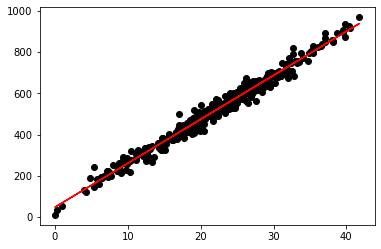

In [124]:
#트레인셋 시각화

plt.scatter(X_train,y_train,color='black')
plt.plot(X_train,regressor.predict(X_train),color='red')

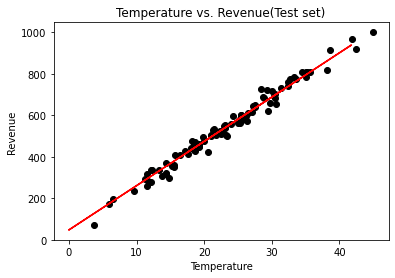

In [128]:
#테스트셋 시각화

plt.scatter(X_test,y_test,color='black')
plt.plot(X_train,regressor.predict(X_train),color='red')
plt.title("Temperature vs. Revenue(Test set)")
plt.xlabel("Temperature")
plt.ylabel("Revenue")
plt.show()

# Multiple Linear Regression


In [130]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [131]:
df = pd.read_csv("C:/Users/juhan/Untitled Folder/파이썬머신러닝/lecture2/Admission_Predict.csv")
df.shape

(400, 9)

In [132]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [ ]:
# index 역할을 하는 'Serial No.' 칼럼 제거

In [134]:
del df['Serial No.']

KeyError: 'Serial No.'

In [135]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [136]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


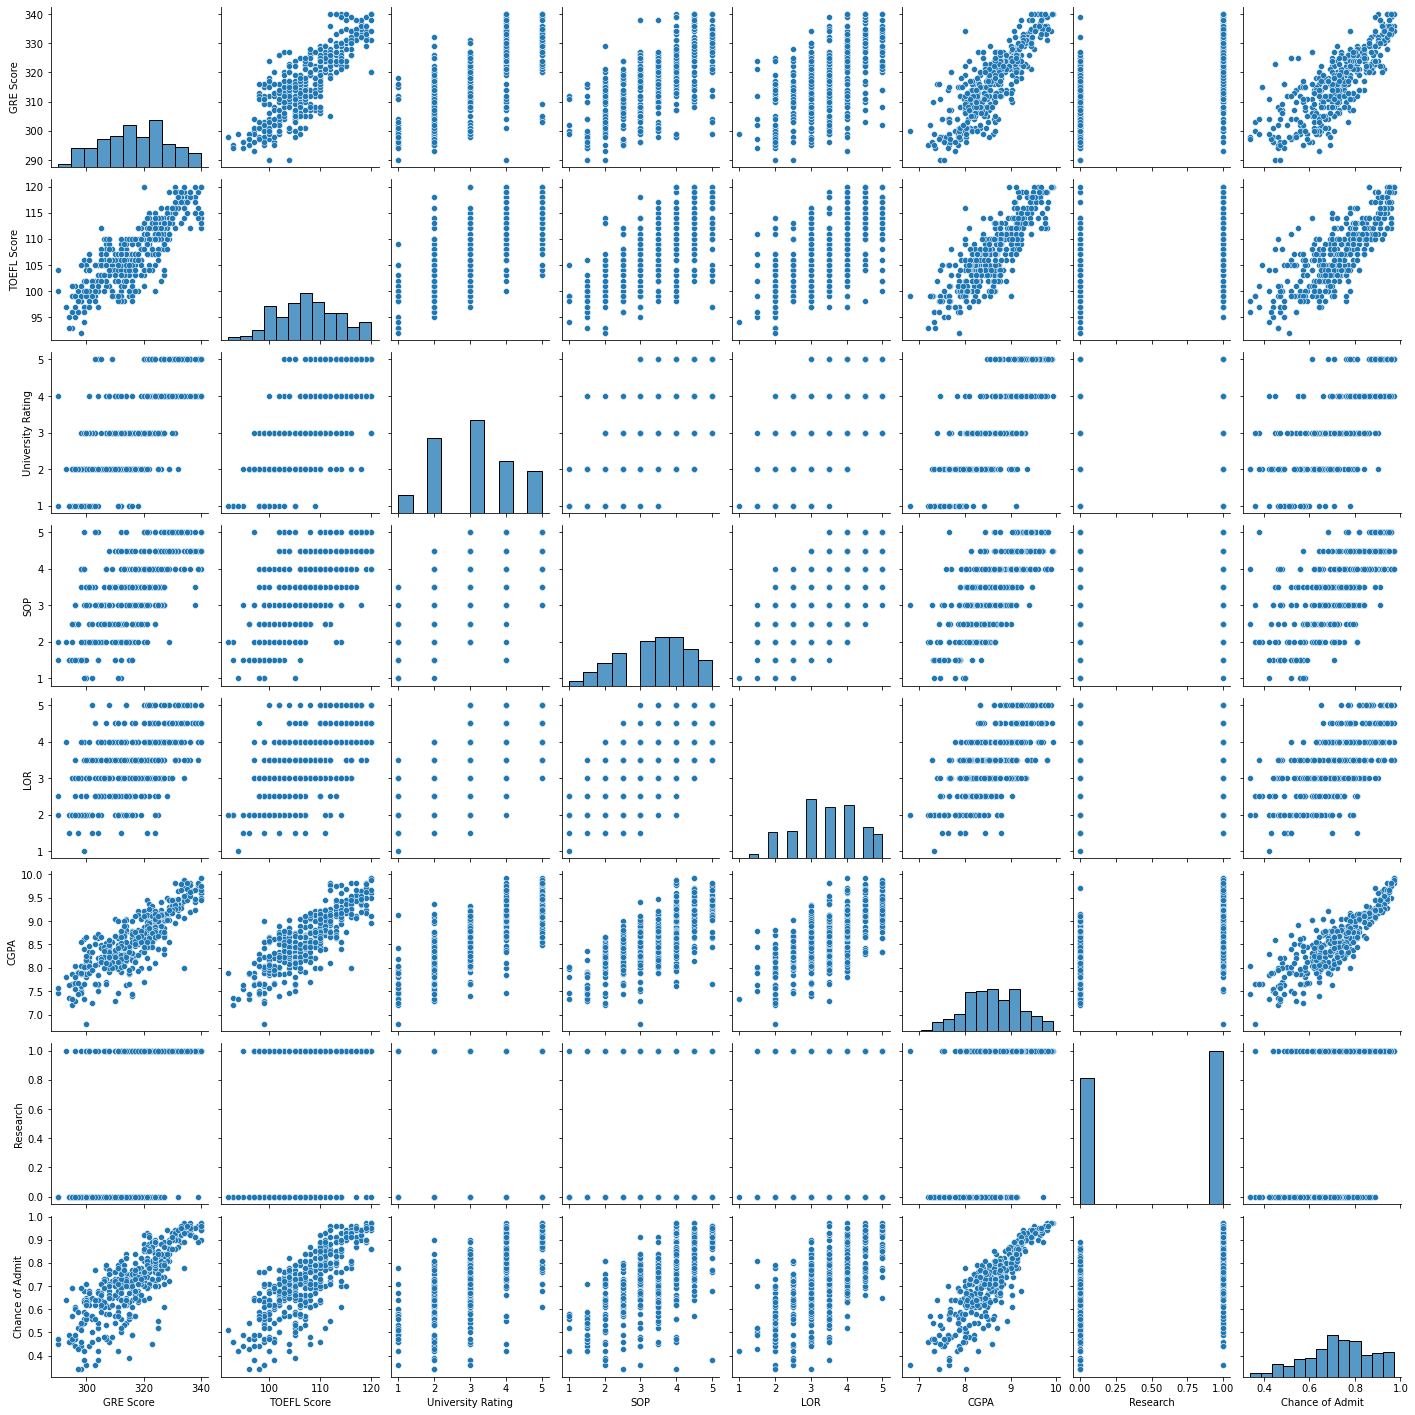

In [137]:
#데이터 시각화

sns.pairplot(df)

<AxesSubplot:>

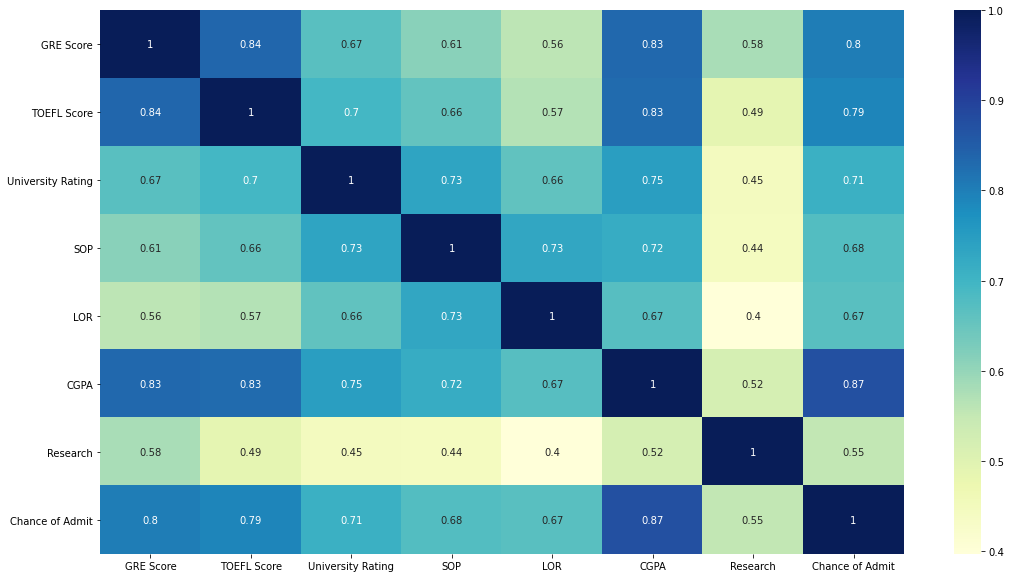

In [140]:
# annot=True 각 맵마다 주석표시할지 여부

plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

# 독립변수,종속변수 할당

In [142]:
# 독립변수,종속변수 할당

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [143]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [144]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit, Length: 400, dtype: float64

# 데이터셋 분할

In [145]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train.shape

(320, 7)

# 훈련모델

In [149]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [150]:
# 회귀계수 확인
regressor.coef_

array([ 0.00151123,  0.00314554,  0.00824371, -0.00564734,  0.02172334,
        0.11532606,  0.02610078])

In [151]:
#절편 확인

regressor.intercept_

-1.1772232142223094

# 값 예측

In [154]:
y_pred = regressor.predict(X_test)
y_pred.shape

(80,)

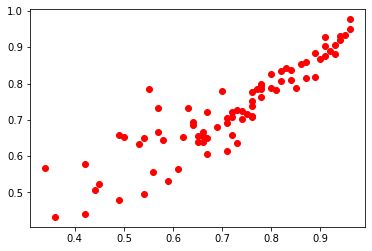

In [155]:
#예측한 y값(y_pred)과 실제(y_test)값 비교해보기

plt.scatter(y_test,y_pred,color='r')


In [156]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

# RMSE(평균 제곱근 오차(Root Mean Square Error))
# https://en.wikipedia.org/wiki/Root-mean-square_deviation
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_pred) / y_test ) ) * 100

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE, 
      '\nR2 =', r2, 
      '\nAdjusted R2 =', adj_r2, 
      '\nMean Absolute Percentage Error =', MAPE, '%') 

#Adjusted R2 = 0.7892284034508166  모형에대한 설명력이 78%라는말


RMSE = 0.06665342999422269 
MSE = 0.004442679729994745 
MAE = 0.044957798995776746 
R2 = 0.80790436770201 
Adjusted R2 = 0.7892284034508166 
Mean Absolute Percentage Error = 7.778670511284584 %


In [157]:
from scipy import stats
# reference. https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

params = np.append(regressor.intercept_, regressor.coef_)
predictions = regressor.predict(X_train)

newX = pd.DataFrame({"Constant":np.ones(len(X_train))}).join(pd.DataFrame(X_train.reset_index(drop=True)))
MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X_train),1)), X, axis=1)
# MSE = (sum((y_train-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-len(newX.values[0])))) for i in ts_b]


sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

df_summary = pd.DataFrame()
df_summary["Coefficients"],df_summary["Standard Errors"],df_summary["t values"],df_summary["Probabilities"] = [params,sd_b,ts_b,p_values]
df_summary.index = ['constant'] + list(X_train.columns)
df_summary

,Coefficients,Standard Errors,t values,Probabilities
constant,-1.1772,0.139,-8.495,0.000
GRE Score,0.0015,0.001,2.285,0.023
TOEFL Score,0.0031,0.001,2.656,0.008
University Rating,0.0082,0.006,1.476,0.141
SOP,-0.0056,0.006,-0.905,0.366
LOR,0.0217,0.006,3.576,0.000
CGPA,0.1153,0.014,8.453,0.000
Research,0.0261,0.009,2.930,0.004


In [158]:
chosen_column = ['GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'CGPA', 'Research']

X_train = X_train[chosen_column]

X_test = X_test[chosen_column]


In [159]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [160]:
y_pred = regressor.predict(X_test)

In [161]:
y_pred.shape

(80,)

Text(0.5, 0, 'True (ground truth)')

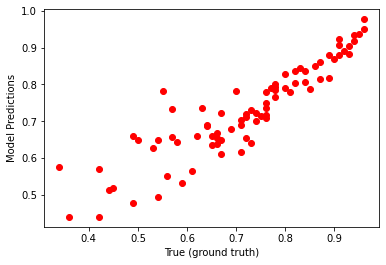

In [162]:
plt.scatter(y_test, y_pred, color = 'r')
plt.ylabel('Model Predictions')
plt.xlabel('True (ground truth)')

In [163]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
MAPE = np.mean( np.abs((y_test - y_pred) / y_test ) ) * 100

print('RMSE =',RMSE, 
      '\nMSE =',MSE, 
      '\nMAE =',MAE, 
      '\nR2 =', r2, 
      '\nAdjusted R2 =', adj_r2, 
      '\nMean Absolute Percentage Error =', MAPE, '%') 

RMSE = 0.0663670768682082 
MSE = 0.004404588892030656 
MAE = 0.04501325772426065 
R2 = 0.8095513654709625 
Adjusted R2 = 0.7910355260028616 
Mean Absolute Percentage Error = 7.796132121433253 %
